# Report 2 - Linked List and Binary Search Tree
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions

1. **Singly Linked List** - it's a list that can be traversed only from the beginning to the end. Each node can be anywhere in the memory and point to its successor. It allocates the memory dynamically. Therefore it optimizes memory usage. We do not need to specify the size of a linked list in advance.
2. **Binary Search Tree** - some description here

### Time complexity comparison

|  | Insert | Search | Remove | Min / Max | Number of elements |
| --- | --- | --- | --- | --- | ---  |
| Singly Linked List | $O()$ | $O()$ | $O()$ | $O()$ | $O()$ |
| Binary Search Tree | $O()$ | $O()$ | $O()$ | $O()$ | $O()$ |

## Code

### Linked List

In [6]:
class Node:
    def __init__(self, data) -> None:
        self.val = data
        self.next = None

    def add(self, data):
        while self.next is not None:
            self = self.next
        self.next = Node(data)
    
    def exist(self, data):
        while self.val != data and self.next is not None:
            self = self.next

        return self.val == data
        
    def remove(self, data):
        if not self.exist(data):
            print(f'Remove: given element ({data}) does not exist')
            return 

        if self.val == data: # removing the first element
            self.val = self.next.val
            self.next = self.next.next if self.next.next is not None else None
            print(f'Removed {data} succesfully')
            return

        while self.next is not None: # removing anything else
            if self.next.val == data and self.next.next is None:
                self.next = None
                print(f'Removed {data} succesfully')
                return
            elif self.next.val == data:
                self.next = self.next.next
            else:
                self = self.next

    def maxi(self, M=-2147483647):
        while self.next is not None:
            if self.val > M:
                M = self.val
            self = self.next

        return max(self.val, M)
        
    def mini(self, m=2147483647):
        while self.next is not None:
            if self.val < m:
                m = self.val
            self = self.next

        return min(self.val, m)
        
    def total_elements(self, count=0):
        if self.val is not None:
            count += 1

        while self.next is not None:
            count += 1
            self = self.next

        return count
            
    def __str__(self) -> str:
        s = f'{self.val}'
        while self.next is not None:
            self = self.next
            s += f' -> {self.val}'
        return s

Testing

In [7]:
List = Node(5)
List.add(3)
List.add(1)
List.add(2)
List.add(4)
print(f'Before removal: {List}')
List.remove(5)
List.remove(7)
print(f'After removal: {List}')
print(f'2 exists in the list: {List.exist(2)}')
print(f'5 exists in the list: {List.exist(5)}')
print(f'Max element: {List.maxi()}')
print(f'Min element: {List.mini()}')
print(f'Total elements: {List.total_elements()}')

Before removal: 5 -> 3 -> 1 -> 2 -> 4
Removed 5 succesfully
Remove: given element (7) does not exist
After removal: 3 -> 1 -> 2 -> 4
2 exists in the list: True
5 exists in the list: False
Max element: 4
Min element: 1
Total elements: 4


### Binary Search Tree

In [8]:
from graphviz import Digraph
import random

def print_tree(root):
    dot = Digraph("Tree",strict=False)
    dot.format='png'
    dot.node("RT",str(root.val))
    def add_rec(dot:Digraph,node,name,parent_name="RT"):
        if node is None:return
        dot.node(name,str(node.val))
        if name != "RT":dot.edge(parent_name,name)

        add_rec(dot, node.left, f"{name}L", name)
        add_rec(dot, node.right, f"{name}R", name)

    add_rec(dot,root,"RT")
    dot.view()

class tree_node:
    def __init__(self,val,parent=None,left=None,right=None) -> None:
        self.val = val
        self.parent = parent
        self.left = left
        self.right = right

class tree:
    def __init__(self,val) -> None:
        self.anchor = tree_node(-float("inf")) #we need an anchor so that every node with a value has a parent
        self.root_node = self.anchor
        self.insert(val)
        self.root_node = self.anchor.right
    
    def insert(self,value):
        curr = self.root_node
        while curr != None:
            if value >= curr.val:
                if curr.right is None:
                    curr.right = tree_node(value,curr)
                    return 0
                else:
                    curr = curr.right
            elif curr.left is None:
                curr.left = tree_node(value,curr)
                return True
            else:
                curr = curr.left
        return False
    
    #returns node with value from subtree with root=root or None if value is not in tree
    def getnode(self,value,root = None):
        curr = self.root_node if root is None else root
        while (curr != None):
            if value == curr.val:return curr
            else:
                curr = curr.right if value > curr.val else curr.left
        return None
    def contains(self,value):
        return bool(self.getnode(value))
    
    def min(self,node = None):
        curr = self.root_node if node is None else node
        mini = curr.val
        while (curr := curr.left) != None:
            if curr.val < mini: mini = curr.val
        return mini
    
    def max(self,node = None):
        curr = self.root_node if node is None else node
        mx = curr.val
        while (curr := curr.right) != None:
            if curr.val > mx: mx = curr.val
        return mx

    def num_elements(self,node = None):
        if node is None: node = self.root_node
        return 1 + (self.num_elements(node.left) if node.left != None else 0) + (self.num_elements(node.right) if node.right != None else 0) 
    
    def remove(self,value,root = None):
        n = self.getnode(value, self.root_node if root is None else root)
        if n is None:
            print(f"Node with value {value} does not exist") 
            return False

        if n.left is None and n.right is None:
            if n.parent.val <= n.val: n.parent.right = None
            else: n.parent.left = None
            del n
        elif n.left is not None and n.right is not None:
            n.val = self.min(n.right)
            self.remove(n.val,n.right)
        else:
            node_to_connect = n.left if n.left != None else n.right
            if n.parent.val <= n.val: n.parent.right = node_to_connect
            else: n.parent.left = node_to_connect
            node_to_connect.parent = n.parent
            if n == self.root_node: self.root_node = self.anchor.right
            del n

Testing

In [9]:
n=100
t = tree(n//2)

arr = list(range(n))
for i in [arr.pop(random.randint(0,n-i-1)) for i in range(n)]:
    t.insert(i)

print(t.num_elements())
t.remove(n//2)
t.remove(n//2)
print_tree(t.root_node)

101


### Timer

In [ ]:
...

## Graphs

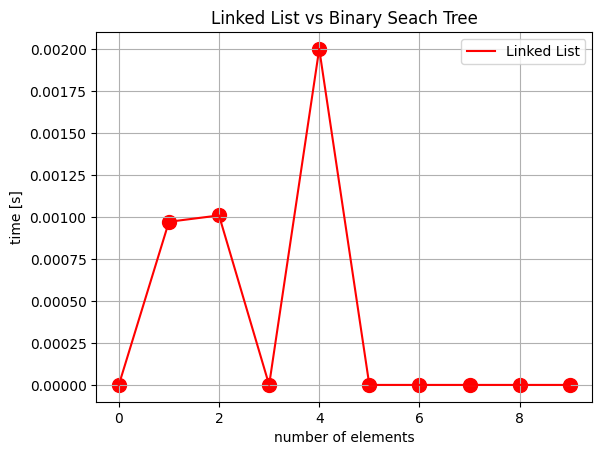

"\nfig, ax = plt.subplots(1, 1)\nax.plot(x[:10], linked_list[:10], color='red', label='Linked List')\nax.plot(x[:10], bst[:10], color='green', label='Binary Search Tree')\n\nplt.scatter(x[:10], linked_list[:10], s=100, c='red', marker='o')#\nplt.scatter(x[:10], bst[:10], s=100, c='green', marker='o')#\n\nplt.title('Linked List vs Binary Search Tree')\nplt.xlabel('number of elements')\nplt.ylabel('time [s]')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [1]:
'''
Measure how much time it takes to check existence of an element depending on the number
of them. All your results should be presented using graphs.
'''
import matplotlib.pyplot as plt
import numpy as np

# Load and rearrange the data
linked_list = np.loadtxt('linked_list.txt', delimiter=' ')
#bst = np.loadtxt('bst.txt', delimiter=' ')
x = np.arange(len(linked_list))

# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, linked_list, color='red', label='Linked List')
#ax.plot(x, bst, color='green', label='Binary Search Tree')

plt.scatter(x, linked_list, s=100, c='red', marker='o')#
#plt.scatter(x, bst, s=100, c='green', marker='o')#

plt.title('Linked List vs Binary Seach Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()

'''
fig, ax = plt.subplots(1, 1)
ax.plot(x[:10], linked_list[:10], color='red', label='Linked List')
ax.plot(x[:10], bst[:10], color='green', label='Binary Search Tree')

plt.scatter(x[:10], linked_list[:10], s=100, c='red', marker='o')#
plt.scatter(x[:10], bst[:10], s=100, c='green', marker='o')#

plt.title('Linked List vs Binary Search Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()
'''